In [11]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector

State of quantum circuit before sampling: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
State of quantum circuit after sampling: Statevector([ 0.25+1.38777878e-17j,  0.25+0.00000000e+00j,
             -0.25-8.32667268e-17j,  0.25-1.38777878e-17j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25+1.38777878e-17j,  0.25+0.00000000e+00j,
              0.25-3.10461978e-34j,  0.25+0.00000000e+00j,
              0.25+4.16333634e-17j,  0.25-1.38777878e-17j,
              0.25+0.00000000e+00j,  0.25+0.00000000e+00j,
              0.25-3.10461978e-34j,  0.25+0.00000000e+00j],
            dims=(2, 2, 2, 2))
State of quantum circuit after sampling: Statevector([-0.1875+5.55111512e-17j, -0.1875+1.38777878e-17j,
              0.6875+3.05311332e-16j, -0.1875-5.55111512e-17j,
             -0.1875+0.00000000e+00j, -0.1875+2

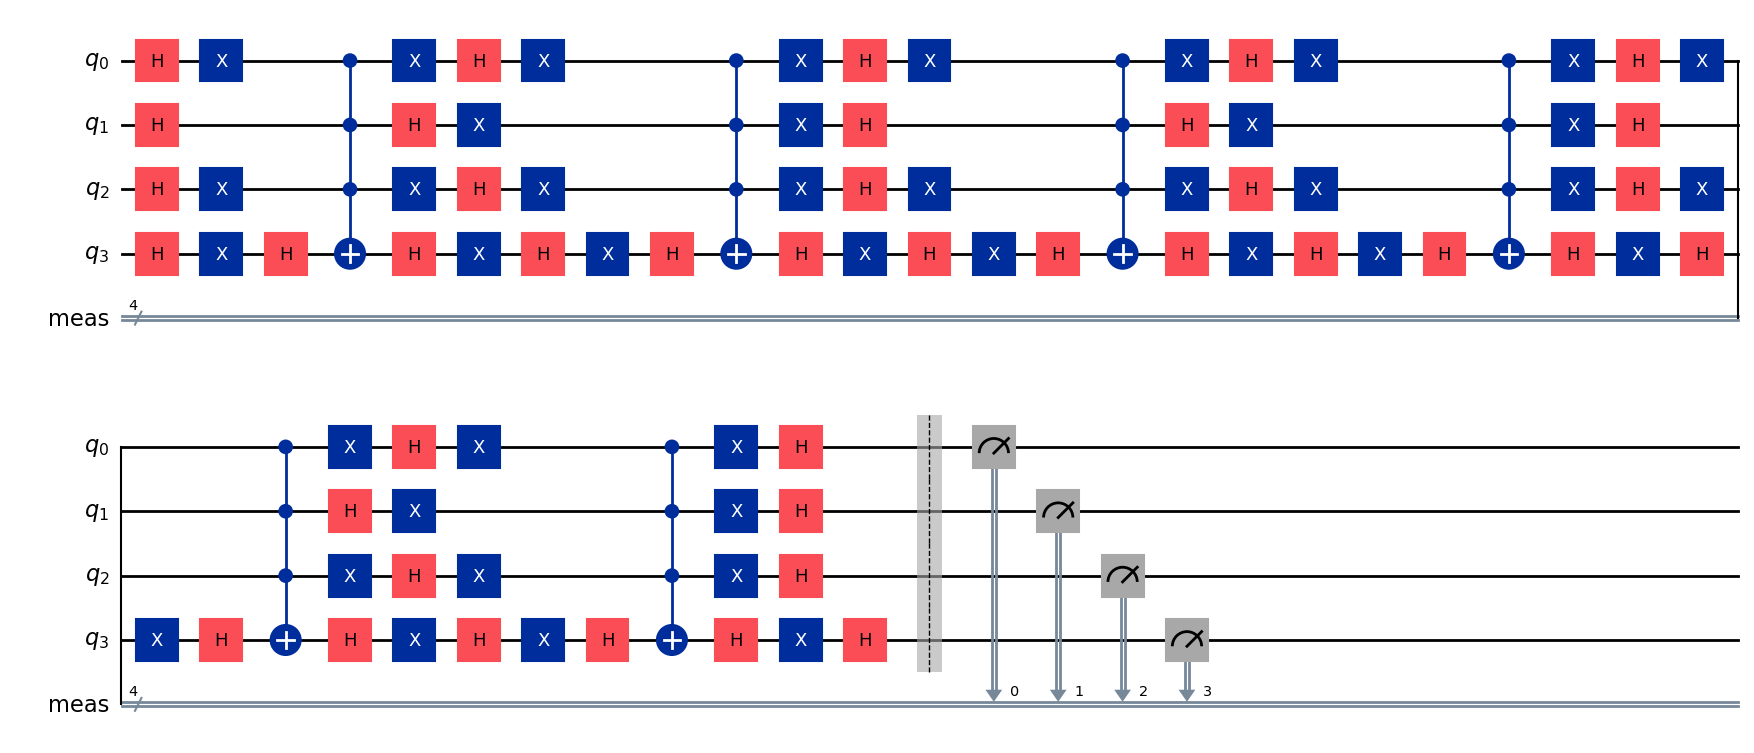

In [12]:
import numpy as np

grover_circ = QuantumCircuit(4)

state = Statevector(grover_circ)
print("State of quantum circuit before sampling:",state)


grover_circ.h([0, 1, 2, 3])  # Apply Hadamard gates to all qubits
iterations = 3

for _ in range(iterations):
    grover_circ.x([3,2,0])  # Korrekte Qubits!
    grover_circ.h(3)
    grover_circ.mcx([0,1,2], 3)
    grover_circ.h(3)
    grover_circ.x([3,2,0])  # Rückgängig

    sampler = StatevectorSampler()
    state = Statevector(grover_circ)
    print("State of quantum circuit after sampling:", state)


    grover_circ.h([0,1,2,3])
    grover_circ.x([0,1,2,3])
    grover_circ.h(3)
    grover_circ.mcx([0,1,2], 3)
    grover_circ.h(3)
    grover_circ.x([0,1,2,3])
    grover_circ.h([0,1,2,3])

sampler = StatevectorSampler()
state = Statevector(grover_circ)
print("State of quantum circuit after second sampling:", state)

grover_circ.measure_all()  # Measure all qubits

sampler = StatevectorSampler()

shots = 20
job = sampler.run([grover_circ], shots=shots)

result = job.result()[0]

state = result.data.meas.get_bitstrings()
print("Measurement result:", state)

counts = result.data.meas.get_counts()
print("\nCounts of measurement outcomes:")
print(counts)


#calculate and print the probabilities of each outcome
prob_dict = {state : c / shots for state, c in counts.items()}
print("\nProbabilities of measurement outcomes:")
print(prob_dict)

grover_circ.draw(output='mpl')



In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Initialisieren
grover_circ = QuantumCircuit(4)

# Schritt 1: Superposition
grover_circ.h([0,1,2,3])

for _ in range(3):
# Oracle für |0010⟩
    grover_circ.x([3,2,0])  # Korrekte Qubits!
    grover_circ.h(3)
    grover_circ.mcx([0,1,2], 3)
    grover_circ.h(3)
    grover_circ.x([3,2,0])  # Rückgängig
    
    # Diffusion
    grover_circ.h([0,1,2,3])
    grover_circ.x([0,1,2,3])
    grover_circ.h(3)
    grover_circ.mcx([0,1,2], 3)
    grover_circ.h(3)
    grover_circ.x([0,1,2,3])
    grover_circ.h([0,1,2,3])

# Zustand überprüfen (vor dem Messen)
state = Statevector(grover_circ)
print("Finaler Zustand:", state)

# Messen
grover_circ.measure_all()

# Simulieren
from qiskit_aer import AerSimulator
sim = AerSimulator()
result = sim.run(grover_circ, shots=20).result()
print("Messungen:", result.get_counts())

Finaler Zustand: Statevector([ 0.05078125+1.07244536e-16j,  0.05078125+9.57181112e-17j,
             -0.98046875-2.72043266e-16j,  0.05078125+3.09167026e-17j,
              0.05078125+6.10236417e-17j,  0.05078125+3.09167026e-17j,
              0.05078125+6.56111721e-17j,  0.05078125+8.18403234e-17j,
              0.05078125+8.87792173e-17j,  0.05078125+1.14183429e-16j,
              0.05078125+1.62755687e-16j,  0.05078125+9.57181112e-17j,
              0.05078125+5.17333843e-17j,  0.05078125+4.02069599e-17j,
              0.05078125+4.71458538e-17j,  0.05078125+1.00305642e-16j],
            dims=(2, 2, 2, 2))
Messungen: {'0110': 1, '0010': 19}


Finaler Zustand: Statevector([ 0.05078125+1.07244536e-16j,  0.05078125+9.57181112e-17j,
             -0.98046875-2.72043266e-16j,  0.05078125+3.09167026e-17j,
              0.05078125+6.10236417e-17j,  0.05078125+3.09167026e-17j,
              0.05078125+6.56111721e-17j,  0.05078125+8.18403234e-17j,
              0.05078125+8.87792173e-17j,  0.05078125+1.14183429e-16j,
              0.05078125+1.62755687e-16j,  0.05078125+9.57181112e-17j,
              0.05078125+5.17333843e-17j,  0.05078125+4.02069599e-17j,
              0.05078125+4.71458538e-17j,  0.05078125+1.00305642e-16j],
            dims=(2, 2, 2, 2))

Counts of measurement outcomes:{'0010': 971, '0101': 1, '0001': 2, '0111': 3, '1001': 3, '1110': 3, '1100': 2, '0011': 2, '1111': 2, '1011': 3, '1101': 2, '1000': 2, '1010': 2, '0000': 1, '0100': 1}
Probability of 0010: 0.9710
Probability of 0101: 0.0010
Probability of 0001: 0.0020
Probability of 0111: 0.0030
Probability of 1001: 0.0030
Probability of 1110: 0.0030
Probability of 

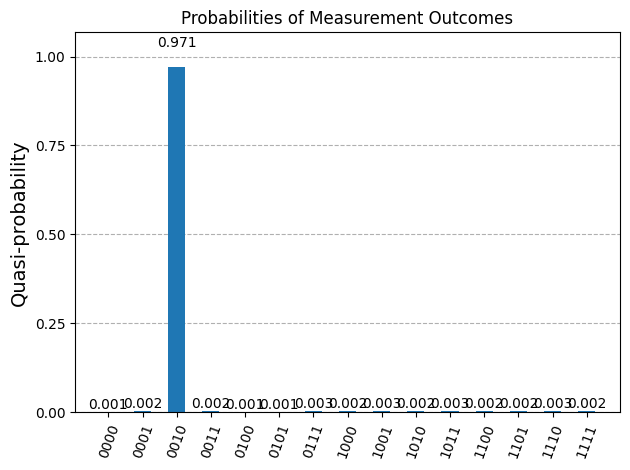

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import math

# Initialise quantum circuit
grover_circ = QuantumCircuit(4)

#All qubits in superposition
grover_circ.h([0, 1, 2, 3])

# Grover's algorithm iterations
for _ in range(int(math.pi)): # formel is π/4*sqrt(N) where N = pow(2,4) 
# Oracle für |0010⟩
    grover_circ.x([3,2,0])  
    grover_circ.h(3)
    grover_circ.mcx([0,1,2], 3)
    grover_circ.h(3)
    grover_circ.x([3,2,0])  
    
    # Diffusion
    grover_circ.h([0,1,2,3])
    grover_circ.x([0,1,2,3])
    grover_circ.h(3)
    grover_circ.mcx([0,1,2], 3)
    grover_circ.h(3)
    grover_circ.x([0,1,2,3])
    grover_circ.h([0,1,2,3])


# check final state before measurement
state = Statevector(grover_circ)
print("Finaler Zustand:", state)

# Measure all qubits
grover_circ.measure_all()

shots = 1000
result = StatevectorSampler().run([grover_circ], shots = shots).result()

counts = result[0].data.meas.get_counts()
print("\nCounts of measurement outcomes:" + str(counts))

for p,c in counts.items():
    print(f"Probability of {p}: {c/shots:.4f}")

pro_dict = {state: c / shots for state, c in counts.items()}

plot_histogram({state: c / shots for state, c in counts.items()},title="Probabilities of Measurement Outcomes")

